Importing necessary libraries

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Load MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocessing: Normalize the pixel val to be b/w 0 and 1

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Reshape img to (28,28,1) as they are grayscale

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

Convert labels to one-hot encoded format

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Build CNN model

In [6]:
model = models.Sequential()

First Convolutional Layer

In [7]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Second convolutionall layer

In [8]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

Third convolutional layer

In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Flatten the 3D output to 1D and add a Dense layer

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

Output layer with 10 neurons (for 10 digit classes)

In [12]:
model.add(layers.Dense(10, activation='softmax'))

Compile the model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.8762 - loss: 0.4168 - val_accuracy: 0.9819 - val_loss: 0.0543
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 56ms/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 0.9890 - val_loss: 0.0341
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9898 - val_loss: 0.0319
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.9887 - val_loss: 0.0361
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9923 - val_loss: 0.0252


Evaluate model on test data

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9894 - loss: 0.0332
Test accuracy: 99.23%


Make predictions on test images

In [20]:
predictions = model.predict(test_images)
print(f"Prediction for first test image: {np.argmax(predictions[4])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Prediction for first test image: 4


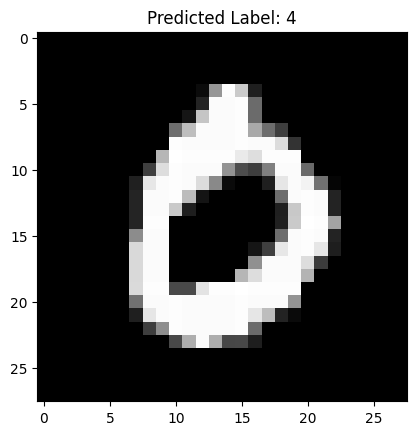

In [22]:
plt.imshow(test_images[3].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predictions[4].argmax()}")
plt.show()